# ASK A MANAGER 2021 SALARY SURVEY - COMPREHENSIVE ANALYSIS


In [6]:
# ASK A MANAGER 2021 SALARY SURVEY - COMPREHENSIVE ANALYSIS
# ============================================================================
# This script provides a complete analysis of the Ask A Manager 2021 salary survey
# including demographic analysis, intersectionality studies, and predictive modeling

# ============================================================================
# 1. IMPORTS AND SETUP
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
# Import XGBoost if available, otherwise skip (optional)
try:
    from xgboost import XGBRegressor
except ImportError:
    print("XGBoost not found. Please install it (pip install xgboost) for better predictive modeling.")
    XGBRegressor = None # Set to None if not available

import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


# Data Loading and Processing


In [9]:
# ============================================================================
# 2. DATA LOADING AND PREPROCESSING
# ============================================================================

import pandas as pd
import warnings

warnings.filterwarnings('ignore')

def load_and_preprocess_data(file_path):
    """Load and preprocess the salary survey data"""
    print("\n2. LOADING AND PREPROCESSING DATA...")

    # Load the data from the specified Excel file path
    df = pd.read_excel('/content/drive/MyDrive/Ask A Manager Salary Survey 2021 (Responses) Final.xlsx')
    print(f"Initial dataset shape: {df.shape}")

    # Rename columns for easier handling
    column_mapping = {
        'How old are you?': 'age',
        'What industry do you work in?': 'industry',
        'Job title': 'job_title',
        'What is your annual salary? (You\'ll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)': 'salary',
        'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.': 'additional_compensation',
        'Please indicate the currency': 'currency',
        'What country do you work in?': 'country',
        "If you're in the U.S., what state do you work in?": 'state',
        'What city do you work in?': 'city',
        'How many years of professional work experience do you have overall?': 'experience_overall',
        'How many years of professional work experience do you have in your field?': 'experience_field',
        'What is your highest level of education completed?': 'education',
        'What is your gender?': 'gender',
        'What is your race? (Choose all that apply.)': 'race'
    }

    df = df.rename(columns=column_mapping)

    # --- Data Cleaning ---
    df['salary'] = pd.to_numeric(df['salary'], errors='coerce')
    df = df[(df['currency'] == 'USD') & (df['salary'] >= 10000) & (df['salary'] <= 500000)].copy()
    df['gender'] = df['gender'].fillna('Prefer not to answer')
    df['race'] = df['race'].fillna('Prefer not to answer')

    print(f"Cleaned dataset shape: {df.shape}")
    print(f"Salary range: ${df['salary'].min():,.0f} - ${df['salary'].max():,.0f}")

    return df

# --- Execute the function ---
file_name = 'Ask A Manager Salary Survey 2021 (Responses) Final.xlsx'
df = load_and_preprocess_data(file_name)

# Display the first few rows of the cleaned data
print("\nCleaned Data Head:")
print(df.head())


2. LOADING AND PREPROCESSING DATA...
Initial dataset shape: (28134, 18)
Cleaned dataset shape: (27790, 18)
Salary range: $10,000 - $500,000

Cleaned Data Head:
                Timestamp    age                       industry  \
0 2021-04-27 11:02:09.743  25-34   Education (Higher Education)   
1 2021-04-27 11:02:21.562  25-34              Computing or Tech   
2 2021-04-27 11:02:38.125  25-34  Accounting, Banking & Finance   
3 2021-04-27 11:02:40.643  25-34                     Nonprofits   
4 2021-04-27 11:02:41.793  25-34  Accounting, Banking & Finance   

                                  job_title  \
0        Research and Instruction Librarian   
1  Change & Internal Communications Manager   
2                      Marketing Specialist   
3                           Program Manager   
4                        Accounting Manager   

  If your job title needs additional context, please clarify here:  salary  \
0                                                NaN                 55000 

# DEMOGRAPHIC AND INTERSECTIONAL ANALYSIS

In [11]:
# ============================================================================
# 3. DEMOGRAPHIC ANALYSIS
# ============================================================================

def analyze_demographics(df):
    """Create simplified demographic groups for clearer analysis."""
    print("\n3a. PERFORMING DEMOGRAPHIC ANALYSIS...")

    # Simplify Race for better grouping
    df['race_simplified'] = df['race'].apply(lambda x: 'Multiple races' if isinstance(x, str) and ',' in x else x)
    df.loc[df['race_simplified'].isin(['Black or African American', 'Hispanic, Latino, or Spanish origin',
                                       'Native American or Alaska Native', 'Middle Eastern or North African']),
           'race_simplified'] = 'Other'

    # Simplify Industry
    def group_industry(industry):
        if not isinstance(industry, str):
            return 'Other'
        industry_lower = industry.lower()
        if 'tech' in industry_lower or 'computing' in industry_lower:
            return 'Tech'
        if 'health' in industry_lower:
            return 'Healthcare'
        if 'education' in industry_lower:
            return 'Education'
        if 'finance' in industry_lower or 'accounting' in industry_lower:
            return 'Finance/Accounting'
        if 'engineering' in industry_lower:
            return 'Engineering'
        if 'government' in industry_lower:
            return 'Government'
        if 'law' in industry_lower:
            return 'Law'
        return 'Other'

    df['industry_grouped'] = df['industry'].apply(group_industry)

    print("Simplified 'race' and 'industry' columns created.")
    return df

def analyze_intersectionality(df):
    """Create intersectional features for deeper analysis."""
    print("\n3b. ANALYZING INTERSECTIONALITY...")

    df['gender_race'] = df['gender'].astype(str) + "_" + df['race_simplified'].astype(str)
    df['gender_experience'] = df['gender'].astype(str) + "_" + df['experience_overall'].astype(str)

    print("Intersectional features like 'gender_race' created.")
    return df

# --- Execute the functions ---
df = analyze_demographics(df)
df = analyze_intersectionality(df)

# Display a summary of the new grouped columns
print("\nValue counts for new columns:")
print("\n--- Race (Simplified) ---")
print(df['race_simplified'].value_counts())
print("\n--- Industry (Grouped) ---")
print(df['industry_grouped'].value_counts())


3a. PERFORMING DEMOGRAPHIC ANALYSIS...
Simplified 'race' and 'industry' columns created.

3b. ANALYZING INTERSECTIONALITY...
Intersectional features like 'gender_race' created.

Value counts for new columns:

--- Race (Simplified) ---
race_simplified
White                                                     23031
Multiple races                                             1817
Asian or Asian American                                    1373
Other                                                       718
Another option not listed here or prefer not to answer      605
Prefer not to answer                                        175
Middle Eastern or Northern African                           71
Name: count, dtype: int64

--- Industry (Grouped) ---
industry_grouped
Other                 11197
Tech                   4801
Education              3314
Healthcare             1924
Government             1921
Finance/Accounting     1805
Engineering            1696
Law                    1132
Name:

# Comprehensive Visualizations



In [12]:
# ============================================================================
# 4. VISUALIZATION FUNCTIONS
# ============================================================================

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

#-------------------------------------------------------------------------------
# FUNCTION 1: The original main dashboard visualization
#-------------------------------------------------------------------------------
def create_demographic_visualizations(df):
    """Create comprehensive demographic visualizations using Plotly"""
    print("\n4. CREATING DEMOGRAPHIC VISUALIZATIONS...")

    # --- Main Dashboard (2x3 Grid) ---
    fig = make_subplots(
        rows=2, cols=3,
        subplot_titles=(
            'Median Salary by Gender', 'Median Salary by Race/Ethnicity', 'Median Salary by Age Group',
            'Salary Distribution by Gender', 'Median Salary: Industry vs Gender', 'Median Salary by Overall Experience'
        ),
        vertical_spacing=0.15, horizontal_spacing=0.05
    )

    # 1. Median Salary by Gender
    gender_data = df.groupby('gender')['salary'].median().sort_values(ascending=False)
    fig.add_trace(go.Bar(x=gender_data.index, y=gender_data.values, name='Gender', marker_color='#4ECDC4'), row=1, col=1)

    # 2. Median Salary by Race/Ethnicity
    race_data = df.groupby('race_simplified')['salary'].median().sort_values(ascending=False)
    fig.add_trace(go.Bar(x=race_data.index, y=race_data.values, name='Race', marker_color='skyblue'), row=1, col=2)

    # 3. Median Salary by Age Group
    age_order = ['18-24', '25-34', '35-44', '45-54', '55-64', '65 or over']
    age_data = df.groupby('age')['salary'].median().reindex([age for age in age_order if age in df['age'].unique()])
    fig.add_trace(go.Scatter(x=age_data.index, y=age_data.values, mode='lines+markers', name='Age Group', line=dict(color='green')), row=1, col=3)

    # 4. Salary Distribution by Gender (Histogram)
    top_genders = df['gender'].value_counts().nlargest(3).index
    for gender in top_genders:
        fig.add_trace(go.Histogram(x=df[df['gender'] == gender]['salary'], name=gender, opacity=0.6), row=2, col=1)

    # 5. Median Salary Heatmap: Industry vs Gender
    top_industries = df['industry_grouped'].value_counts().nlargest(5).index
    heatmap_data = df[df['industry_grouped'].isin(top_industries) & df['gender'].isin(top_genders)]
    industry_gender = pd.crosstab(heatmap_data['industry_grouped'], heatmap_data['gender'], values=heatmap_data['salary'], aggfunc='median')
    fig.add_trace(go.Heatmap(z=industry_gender.values, x=industry_gender.columns, y=industry_gender.index, colorscale='YlOrRd', colorbar_len=0.3, colorbar_y=0.2), row=2, col=2)

    # 6. Median Salary by Overall Experience
    exp_order = ['1 year or less', '2 - 4 years', '5-7 years', '8 - 10 years', '11 - 20 years', '21 - 30 years', '31 - 40 years', '41 years or more']
    exp_data = df.groupby('experience_overall')['salary'].median().reindex([exp for exp in exp_order if exp in df['experience_overall'].unique()])
    fig.add_trace(go.Scatter(x=exp_data.index, y=exp_data.values, mode='lines+markers', name='Experience', line=dict(color='purple')), row=2, col=3)

    fig.update_layout(height=800, width=1200, title_text='Ask A Manager 2021: Demographic Analysis of Salaries', showlegend=False)
    fig.show()

#-------------------------------------------------------------------------------
# FUNCTION 2: New plot for salary distribution by gender and education
#-------------------------------------------------------------------------------
def plot_salary_by_gender_education(df):
    """Create a box plot to show salary distribution by gender and education."""
    print("\nPlotting salary distribution by gender and education...")

    # For clarity, let's focus on the most common education levels
    top_education = df['education'].value_counts().nlargest(5).index
    df_filtered = df[df['education'].isin(top_education)]

    fig = px.box(
        df_filtered,
        x='education',
        y='salary',
        color='gender',
        title='Salary Distribution by Education and Gender',
        labels={'salary': 'Annual Salary ($)', 'education': 'Highest Level of Education'},
        category_orders={'education': ["High School", "Some college", "College degree", "Master's degree", "PhD"]}
    )
    fig.show()


#-------------------------------------------------------------------------------
# --- EXECUTION BLOCK ---
# This part of the script will run all the visualization code.
#-------------------------------------------------------------------------------

# 1. Call the function for the new Gender & Education plot
plot_salary_by_gender_education(df)

# 2. Call the function for the main dashboard and pay gap analysis
create_demographic_visualizations(df)

# 3. Run the new Additional Compensation analysis
print("\nAnalyzing Additional Compensation...")
# First, create an aggregated DataFrame with the median values
agg_df_comp = df.groupby(['experience_overall', 'gender'], as_index=False)['additional_compensation'].median()
# Now, plot the aggregated DataFrame
fig_add_comp = px.bar(
    agg_df_comp,
    x='experience_overall',
    y='additional_compensation',
    color='gender',
    barmode='group',
    title='Median Additional Compensation by Experience and Gender',
    labels={'additional_compensation': 'Median Additional Compensation ($)', 'experience_overall': 'Overall Experience'},
    category_orders={'experience_overall': ['1 year or less', '2 - 4 years', '5-7 years', '8 - 10 years', '11 - 20 years', '21 - 30 years', '31 - 40 years', '41 years or more']}
)
fig_add_comp.show()


Plotting salary distribution by gender and education...



4. CREATING DEMOGRAPHIC VISUALIZATIONS...



Analyzing Additional Compensation...


In [13]:
# ============================================================================
# 5. PREPARE DATA FOR MACHINE LEARNING
# ============================================================================

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import re

def prepare_ml_data_enhanced(df):
    """Prepare data using OneHotEncoder and sanitize feature names for XGBoost."""
    print("\n5. PREPARING DATA FOR ML (with OneHotEncoder)...")

    feature_columns = ['age', 'gender', 'race', 'education',
                       'experience_overall', 'experience_field', 'industry']

    X = df[feature_columns].copy().astype(str)
    y = df['salary'].copy()

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), feature_columns)
        ],
        remainder='passthrough'
    )

    X_processed = preprocessor.fit_transform(X)
    feature_names = preprocessor.get_feature_names_out()
    X_encoded = pd.DataFrame(X_processed, columns=feature_names, index=X.index)

    # --- THIS IS THE FIX ---
    # Sanitize feature names to remove characters that XGBoost dislikes
    X_encoded.columns = X_encoded.columns.str.replace('[', '_', regex=False).str.replace(']', '_', regex=False).str.replace('<', '_', regex=False)
    print("Feature names sanitized for XGBoost.")

    print(f"Final dataset shape for ML: {X_encoded.shape}")
    return X_encoded, y

# --- Execute the function ---
X_final, y_final = prepare_ml_data_enhanced(df)

print("\nEncoded Data Head with Sanitized Columns:")
print(X_final.head())


5. PREPARING DATA FOR ML (with OneHotEncoder)...
Feature names sanitized for XGBoost.
Final dataset shape for ML: (27790, 1280)

Encoded Data Head with Sanitized Columns:
   cat__age_18-24  cat__age_25-34  cat__age_35-44  cat__age_45-54  \
0             0.0             1.0             0.0             0.0   
1             0.0             1.0             0.0             0.0   
2             0.0             1.0             0.0             0.0   
3             0.0             1.0             0.0             0.0   
4             0.0             1.0             0.0             0.0   

   cat__age_55-64  cat__age_65 or over  cat__age_under 18  cat__gender_Man  \
0             0.0                  0.0                0.0              0.0   
1             0.0                  0.0                0.0              0.0   
2             0.0                  0.0                0.0              0.0   
3             0.0                  0.0                0.0              0.0   
4             0.0      


6. TRAINING AND EVALUATING MODELS...

--- Training Linear Regression ---
Linear Regression Results -> RMSE: $41,867.61 | MAE: $28,602.34 | R²: 0.2705

--- Training Random Forest ---
Random Forest Results -> RMSE: $44,396.09 | MAE: $30,400.12 | R²: 0.1797

--- Training Gradient Boosting ---
Gradient Boosting Results -> RMSE: $41,749.84 | MAE: $28,850.39 | R²: 0.2746

--- Training XGBoost ---
XGBoost Results -> RMSE: $41,966.42 | MAE: $28,570.28 | R²: 0.2670

7. ANALYZING AND VISUALIZING RESULTS...


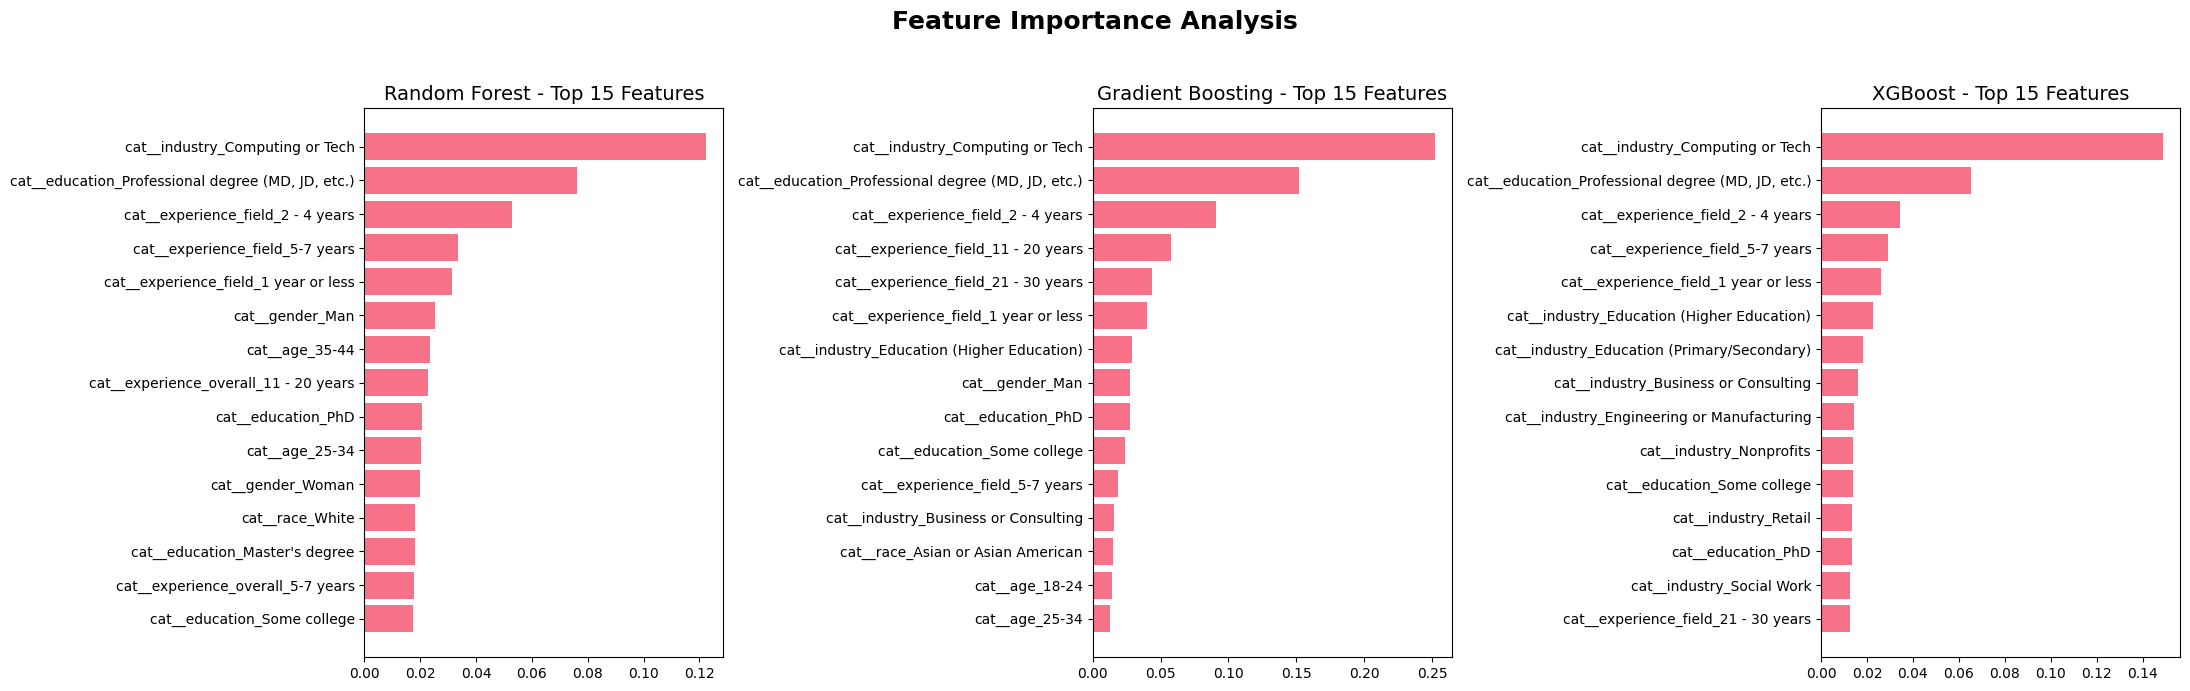

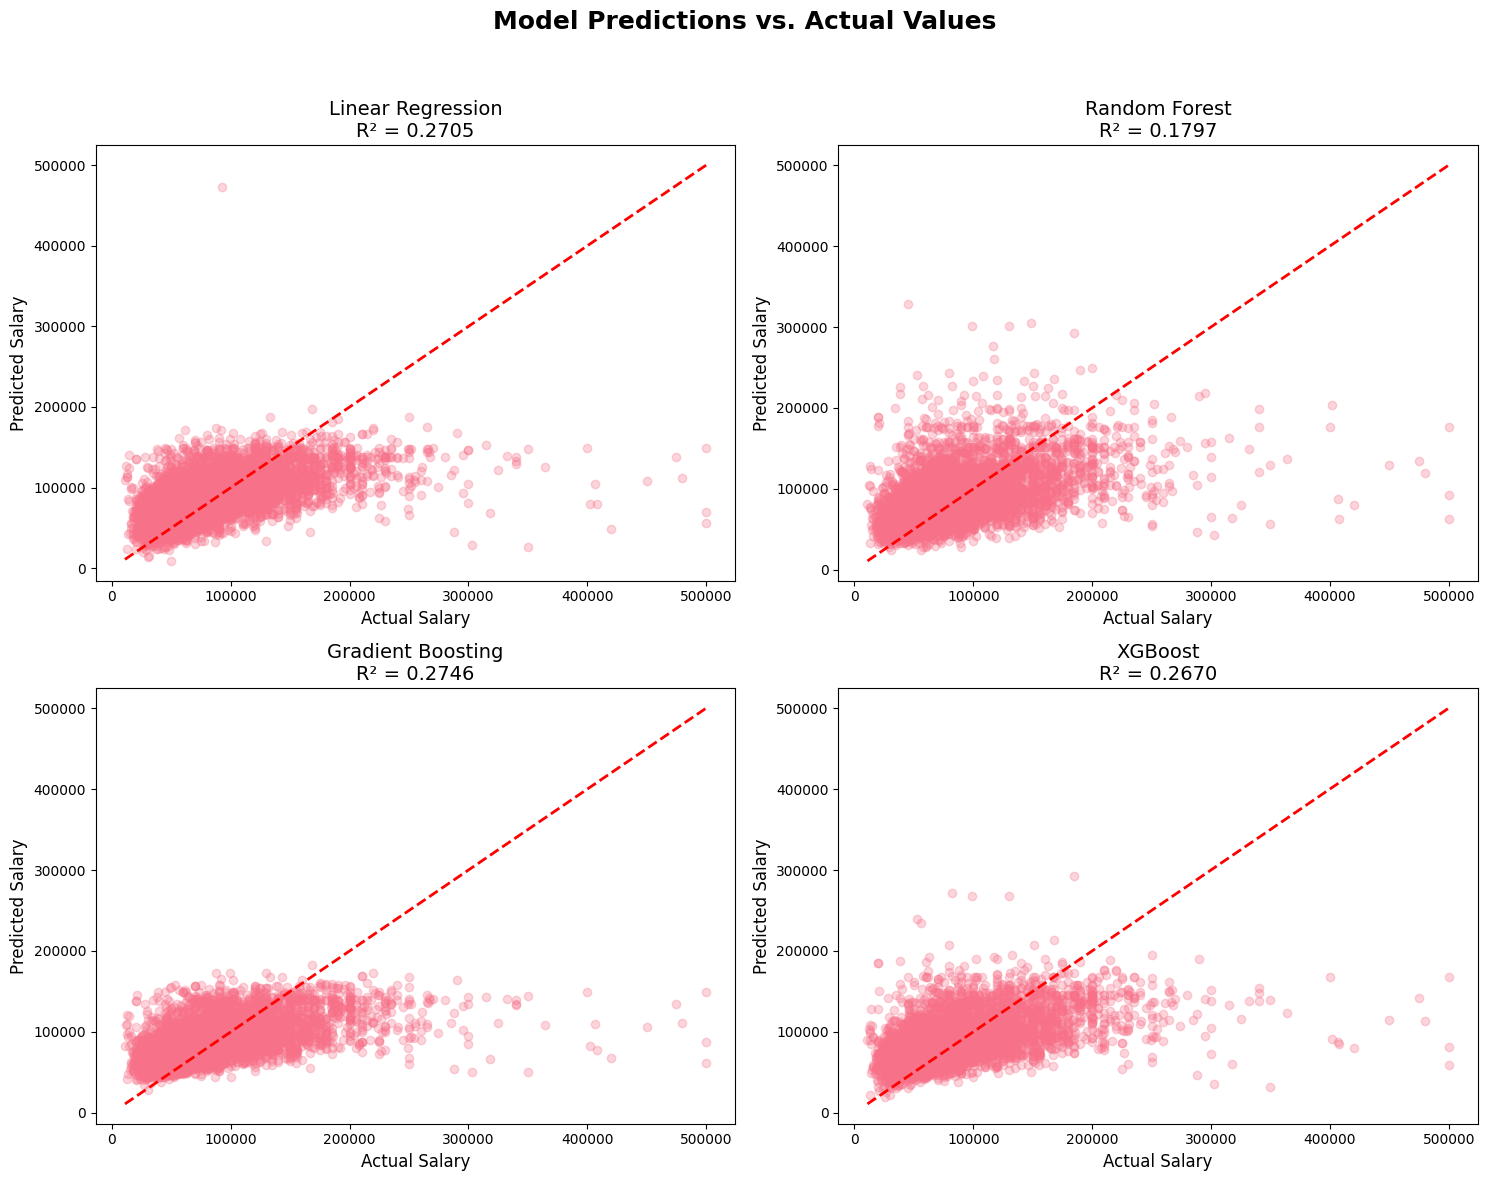

In [14]:
# ============================================================================
# 6.TRAIN, EVALUATE, AND ANALYZE MODELS
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

def train_and_evaluate_models(X, y):
    """Train multiple models and evaluate their performance"""
    print("\n6. TRAINING AND EVALUATING MODELS...")

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42, eval_metric='rmse', n_jobs=-1)
    }

    results = {}

    for name, model in models.items():
        print(f"\n--- Training {name} ---")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results[name] = {'model': model, 'rmse': rmse, 'mae': mae, 'r2': r2, 'predictions': y_pred}

        print(f"{name} Results -> RMSE: ${rmse:,.2f} | MAE: ${mae:,.2f} | R²: {r2:.4f}")

    return results, X_test, y_test

def analyze_and_visualize_results(results, X_test, y_test):
    """Analyze feature importance and create prediction plots"""
    print("\n7. ANALYZING AND VISUALIZING RESULTS...")

    # --- Feature Importance Plot ---
    fig, axes = plt.subplots(1, 3, figsize=(22, 7))
    fig.suptitle('Feature Importance Analysis', fontsize=18, fontweight='bold')

    plot_idx = 0
    for name, result in results.items():
        if hasattr(result['model'], 'feature_importances_'):
            importances = result['model'].feature_importances_
            # Create a pandas series for easier sorting and plotting
            feature_importance_df = pd.Series(importances, index=X_test.columns).sort_values(ascending=False).head(15)

            axes[plot_idx].barh(feature_importance_df.index, feature_importance_df.values)
            axes[plot_idx].invert_yaxis() # Display the most important feature at the top
            axes[plot_idx].set_title(f'{name} - Top 15 Features', fontsize=14)
            plot_idx += 1

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # --- Prediction vs Actual Plot ---
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Model Predictions vs. Actual Values', fontsize=18, fontweight='bold')

    plot_idx = 0
    for name, result in results.items():
        row, col = plot_idx // 2, plot_idx % 2
        axes[row, col].scatter(y_test, result['predictions'], alpha=0.3)
        axes[row, col].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        axes[row, col].set_xlabel('Actual Salary', fontsize=12)
        axes[row, col].set_ylabel('Predicted Salary', fontsize=12)
        axes[row, col].set_title(f'{name}\nR² = {result["r2"]:.4f}', fontsize=14)
        plot_idx += 1

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# --- Execute the functions ---
ml_results, X_test_final, y_test_final = train_and_evaluate_models(X_final, y_final)
analyze_and_visualize_results(ml_results, X_test_final, y_test_final)


7. ADVANCED FEATURE IMPORTANCE WITH SHAP...
SHAP Summary Plot: Shows feature importance and impact.
Each dot is a person. Red dots are high feature values, blue are low.
Dots to the right of the center line increased the salary prediction.


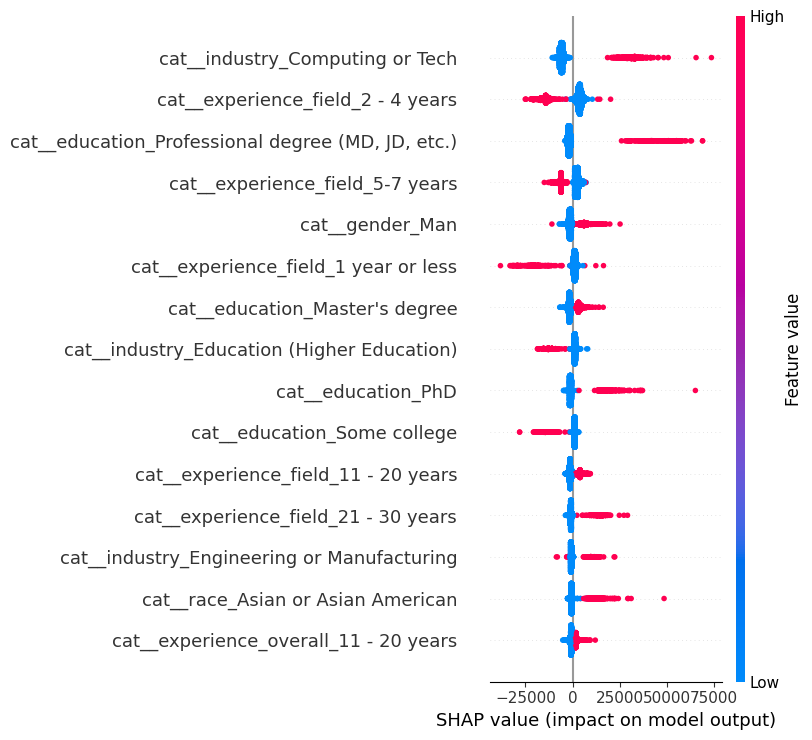

In [15]:
# ============================================================================
# 7. ADVANCED FEATURE IMPORTANCE WITH SHAP
# ============================================================================
import shap

def analyze_shap_importance(results, X_test, feature_names):
    """Use SHAP to explain the best performing model."""
    print("\n7. ADVANCED FEATURE IMPORTANCE WITH SHAP...")

    # Assuming XGBoost is the best model based on R²
    best_model = results['XGBoost']['model']

    # Create a SHAP explainer
    explainer = shap.TreeExplainer(best_model)

    # Calculate SHAP values for the test set
    # This can take a moment on a large dataset
    shap_values = explainer.shap_values(X_test)

    # Create the SHAP summary plot
    print("SHAP Summary Plot: Shows feature importance and impact.")
    print("Each dot is a person. Red dots are high feature values, blue are low.")
    print("Dots to the right of the center line increased the salary prediction.")

    shap.summary_plot(shap_values, X_test, feature_names=feature_names, max_display=15)

# --- Execute the SHAP analysis ---
analyze_shap_importance(ml_results, X_test_final, X_final.columns)